# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Life Expectancy
#### Given data is about finding life expectancy by WHO.

In [2]:
df=pd.read_csv('Life Expectancy.csv')
df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
for i in df.columns:
    if df[i].isnull().sum()<=100:
        df = df.dropna(subset=[i], axis=0)

In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            175
percentage expenditure               0
Hepatitis B                        525
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  212
Diphtheria                           0
 HIV/AIDS                            0
GDP                                435
Population                         644
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    160
Schooling                          160
dtype: int64

In [7]:
df.Alcohol.value_counts()

Alcohol
0.01    272
0.03     15
0.04     13
0.02     12
0.09     12
       ... 
7.09      1
3.71      1
3.46      1
3.67      1
4.57      1
Name: count, Length: 1075, dtype: int64

####  Since out of 2983 482 value is 0.1(mode) we filled the mode in alcoho feature

In [8]:
df['Alcohol'].fillna(df.Alcohol.mode()[0],inplace=True)

In [9]:
df['Hepatitis B'].value_counts()

Hepatitis B
99.0    237
98.0    209
96.0    166
97.0    154
95.0    149
       ... 
16.0      1
1.0       1
15.0      1
11.0      1
19.0      1
Name: count, Length: 87, dtype: int64

In [10]:
df['Hepatitis B'].mean()

81.02200592467203

#### since the frequency of  values are similar in number use mean to fill  

In [11]:
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(),inplace=True)

In [12]:
df['GDP'].value_counts()

GDP
584.259210     1
124.992617     1
1847.198490    1
1792.384500    1
1682.957924    1
              ..
763.662230     1
194.274600     1
8352.817110    1
727.777345     1
547.358878     1
Name: count, Length: 2453, dtype: int64

In [13]:
len(df['GDP'].unique())

2454

####  Out of  

In [14]:
df['Population'].value_counts()

Population
444.0         4
26868.0       2
127445.0      2
718239.0      2
1141.0        2
             ..
1328146.0     1
136425.0      1
143126.0      1
1444844.0     1
12222251.0    1
Name: count, Length: 2237, dtype: int64

In [15]:
df['Population'].fillna(df.Population.mean(),inplace=True)

In [16]:
df['Total expenditure'].value_counts()

Total expenditure
4.60     15
6.70     12
5.60     11
5.25     10
5.30     10
         ..
8.88      1
3.19      1
12.24     1
12.23     1
3.52      1
Name: count, Length: 814, dtype: int64

In [17]:
df['Total expenditure'].fillna(df['Total expenditure'].mean(),inplace=True)

In [18]:
df['GDP'].fillna(df['GDP'].mean(),inplace=True)

In [19]:
df['Income composition of resources'].value_counts()

Income composition of resources
0.000    114
0.700     17
0.739     13
0.714     12
0.636     12
        ... 
0.310      1
0.330      1
0.297      1
0.308      1
0.353      1
Name: count, Length: 625, dtype: int64

In [20]:
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(),inplace=True)

In [21]:
df['Schooling'].value_counts()

Schooling
12.9    58
13.3    52
12.5    49
12.8    45
12.3    44
        ..
20.6     1
19.8     1
3.6      1
3.4      1
2.8      1
Name: count, Length: 173, dtype: int64

#### schooling feature means the number of years of formal education that a person receives on average in a given country. so we can fill average

In [22]:
df['Schooling'].fillna(df['Schooling'].mean(),inplace=True)

In [23]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [24]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [25]:
df['Life expectancy ']

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2888, dtype: float64

In [39]:
X=df.drop('Life expectancy ',axis=1)
y=df['Life expectancy ']

In [27]:
len(df['Country'].unique())

181

#### here there are 181 countries data set in various years

In [28]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [36]:
df['Status']=df['Status'].replace({"Developing":0,"Developed":1})

In [37]:
df['Status'].unique()

array([0, 1], dtype=int64)

In [40]:
X.drop('Country',inplace=True,axis=1)

<Axes: >

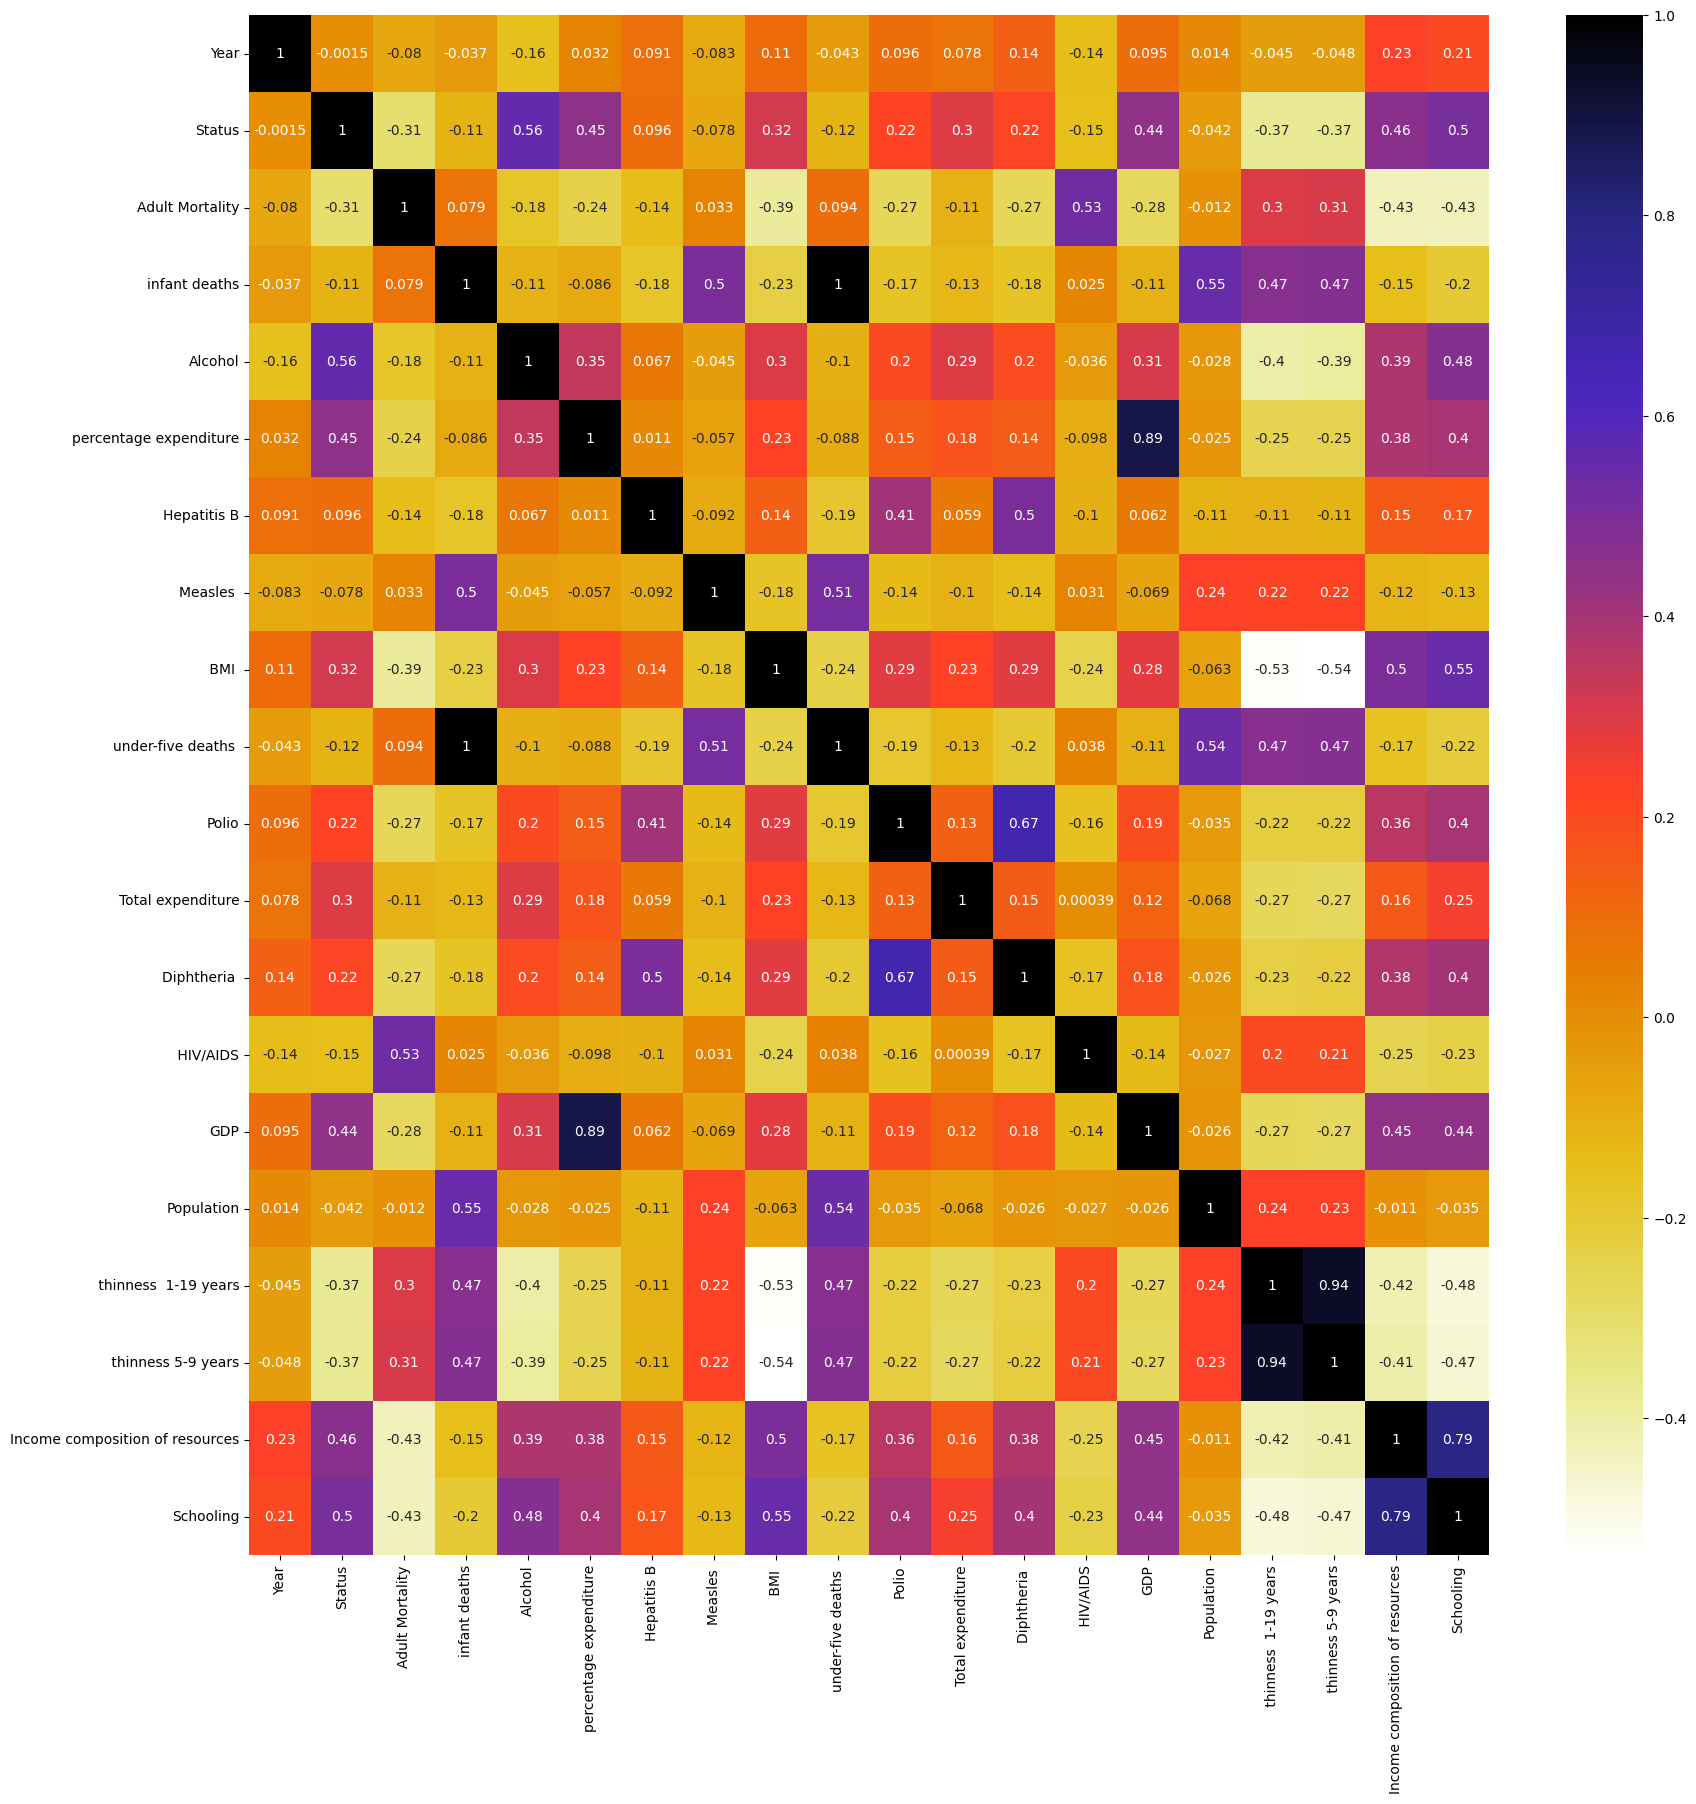

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),annot=True,cmap=plt.cm.CMRmap_r)

#### from our heatmap we can see that there are duplicated columns becasue the correlation value is 1 (under five deaths,infant deaths), so we use to find like these correlations

In [42]:
def correlation(dataset,threshold):
    col_corr=set() # set of all  the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) >= threshold:
 # wheather this correlation coefficient value is greater than our defined value
                colname=corr_matrix.columns[i]#store that column name
                col_corr.add(colname)#add that column name to set to avoid duplicates
    return col_corr

In [43]:
a=correlation(X,0.7)
a

{' thinness 5-9 years', 'GDP', 'Schooling', 'under-five deaths '}

In [44]:
for i in list(a):
    X.drop(i,inplace=True,axis=1)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [47]:
pred1=linear.predict(X_test)

### Performance

In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [49]:
mean_squared_error(y_test,pred1)

18.812833507051014

In [50]:
np.sqrt(mean_squared_error(y_test,pred1))

4.337376339107665

In [51]:
mae=mean_absolute_error(y_test,pred1)
mae

3.2223588295533174

In [52]:
r2_score(y_test,pred1)

0.797333547317195

In [53]:
mape = (mae / y_test.mean()) * 100# mean absolute percentage error
print('MAPE:', mape)# mape below 4 percent is a good model although we cant confirm if we are not comparing it with anothyer model

MAPE: 4.68113412333865


### Decision Tree Regressor

In [54]:
X1=df.drop(['Life expectancy ','Country'],axis=1)


In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, mutual_info_regression
best_feature=SelectKBest(score_func=mutual_info_regression,k=10)
best_feature.fit(X1,y)

SelectKBest(score_func=<function mutual_info_regression at 0x0000020FE41A3D00>)

In [56]:
X1.columns[best_feature.get_support()]

Index(['Adult Mortality', 'infant deaths', ' BMI ', 'under-five deaths ',
       ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [57]:
a=list(X1.columns[best_feature.get_support()])

In [58]:
for i in X1.columns:
    if i not in a:
        X1.drop(i,inplace=True,axis=1)

In [59]:
X1.columns

Index(['Adult Mortality', 'infant deaths', ' BMI ', 'under-five deaths ',
       ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [60]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y,test_size=0.3,random_state=42)

In [61]:
X1_train.shape

(2021, 10)

In [62]:
y1_train.shape

(2021,)

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
Dtree_reg=DecisionTreeRegressor()
Dtree_reg.fit(X1_train,y1_train)

DecisionTreeRegressor()

In [65]:
pred2=Dtree_reg.predict(X1_test)

### Performance

In [66]:
MSE1=mean_squared_error(y1_test,pred2)
MSE1

7.328973471741637

In [67]:
RMSE1=np.sqrt(MSE1)
RMSE1

2.7072076890666583

In [68]:
MAE1=mean_absolute_error(y1_test,pred2)
MAE1

1.5944636678200692

In [69]:
r2=r2_score(y1_test,pred2)
r2

0.9210466060432865

In [70]:
mape1 = (MAE1 / y1_test.mean()) * 100
mape1

2.3162840262860707

### Fitting Multiple Linear Regression according to K best feature selection

In [71]:
linear1=LinearRegression()
linear1.fit(X1_train,y1_train)

LinearRegression()

In [73]:
pred3=linear1.predict(X1_test)

In [74]:
r2_1=r2_score(y1_test,pred3)
r2_1

0.8039350808740299